In [126]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dado = pd.read_csv("graph.csv")

In [127]:
dado.head()

,vertice,adjacente,peso,color
0,Elthon,Computação-Administração-Medicina,100-37-40,#00FF11
1,Patrick,Computação-Administração,60-10,#00FF11
2,Zezinha,Medicina,40,#00FF11
3,Computação,NaN,100-60,#00CCFF
4,Administração,Elthon-Patrick,37-10,#00CCFF


In [128]:
#Criando grafo e adicionando vertices
graph = nx.Graph()
graph.add_nodes_from(dado.vertice)

In [129]:
#Criando as arestas com os pesos
for i in range(len(dado.vertice.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        edges = dado.adjacente[i].split("-")
        pesos = dado.peso[i].split("-")
        for j in range(len(edges)):
            print(dado.vertice[i],edges[j],pesos[j])
            graph.add_weighted_edges_from([(dado.vertice[i],edges[j],pesos[j])]) #Arestas com pesos


Elthon Computação 100
Elthon Administração 37
Elthon Medicina 40
Patrick Computação 60
Patrick Administração 10
Zezinha Medicina 40
Administração Elthon 37
Administração Patrick 10
Medicina Zezinha 40


In [130]:
#Colocando os pesos em uma lista
edges = graph.edges
weights = [graph[u][v]['weight'] for u,v in edges]

In [131]:
#Reescala a largura das arestas
for i in range(len(weights)):
    weights[i] = int(weights[i])
weights_f = [*map(lambda el: el / max(weights) * 10, weights)] #By: Emerson

In [132]:
#Colocando as arestas em uma lista
edges= []
for i in graph.edges:
    edges.append(i)

In [133]:
#Criando o dicionário com os pesos das edges para as labels
edge_labels = {}
for i in range(len(edges)):
    edge_labels[edges[i]] = weights[i]
weights

[100, 37, 40, 60, 10, 40]

In [134]:
#Descobrindo os pesos dos vértices / Opção 1 (para grafos direcionados)
weights_node = []
for i in range(len(dado.peso.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        aux = dado.peso[i].split("-")
        for i in range(len(aux)):
            aux[i] = int(aux[i])
        weights_node.append(sum(aux))
    else:
        weights_node.append(1)
weights_node

[177, 70, 40, 1, 47, 40, 1]

In [142]:
#Descobrindo os pesos dos vértices / Opção 2 (Para grafos não direcionados)
weights_node = []
w = nx.get_edge_attributes(graph, 'weight')
_a = 1
for i in graph.nodes:
    for j in graph.nodes:
        if (i, j) in w:
            _a += int(w[(i, j)])
        elif (j,i) in w:
            _a += int(w[(j, i)])
    if _a != 1:
        weights_node.append(_a-1)
    else:
        weights_node.append(_a)
    _a = 1
    print(weights_node)

[177]
[177, 70]
[177, 70, 40]
[177, 70, 40, 160]
[177, 70, 40, 160, 47]
[177, 70, 40, 160, 47, 80]
[177, 70, 40, 160, 47, 80, 1]


In [143]:
#Reescalando os pesos dos vértices
weights_node = [*map(lambda el: el / max(weights_node) * 1e4, weights_node)] #By: Emerson

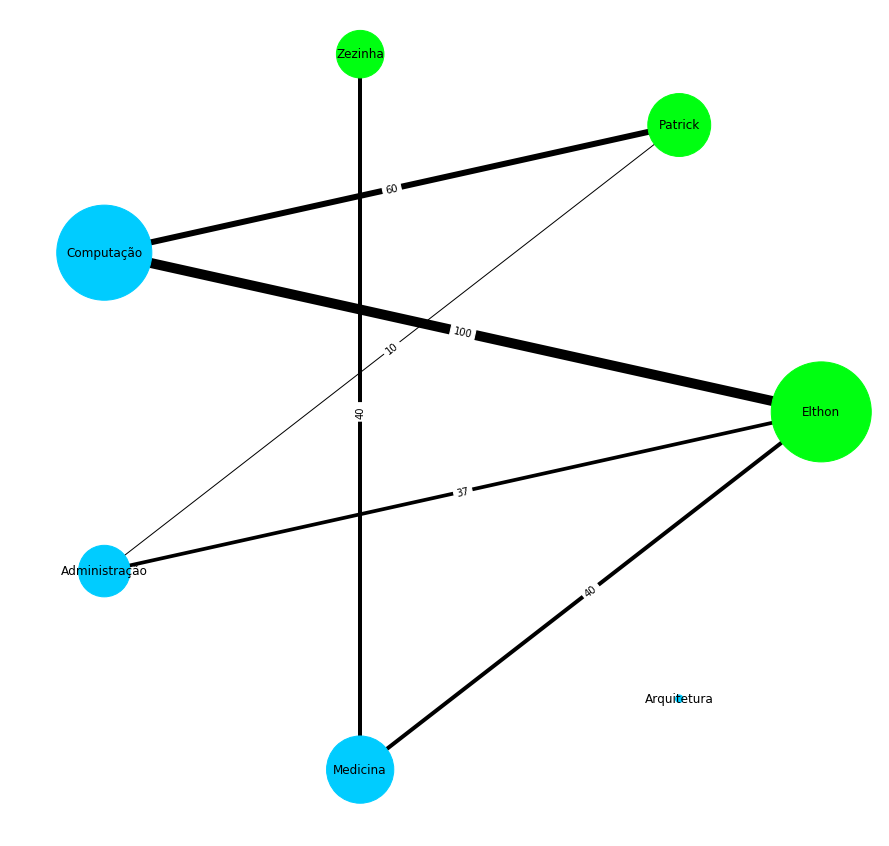

In [144]:
#Plotando o gráfico
#------------------------------------------
fig = plt.figure(figsize = (15,15)) #By: Jadson -> Aumentar o tamanho do gráfico
ax = fig.add_subplot(1,1,1)
#------------------------------------------
#Plotando gráfico
pos = nx.circular_layout(graph)
nx.draw(graph,
        pos,
        node_color=dado.color.values,
        node_size=weights_node,
        with_labels=True,
        alpha = 1,
        width=weights_f,
        ax = ax)

#Plotando edge labels
edge_labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels)
plt.savefig("graph.png")